# 9.1 A Brief matplotlib API Primer

With matplotlib, we use the following import convention:

In [1]:
import matplotlib.pyplot as plt

After running %matplotlib notebook in Jupyter (or simply %matplotlib in IPython), we can try creating a simple plot

If everything is set up right, a line plot like Figure 9-1 should appear:


In [2]:
import numpy as np

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

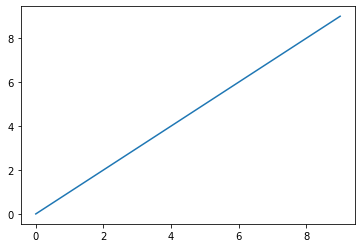

In [5]:
plt.plot(data)

Figure 9-1. Simple line plot

## Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure:

In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In IPython, an empty plot window will appear, but in Jupyter nothing will be shown until we use a few more commands

You can’t make a plot with a blank figure. You have to **create one or more subplots using add_subplot:**

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (numbered from 1)

If you create the next two sub plots, you’ll end up with a visualization that looks like Figure 9-2:

In [8]:
ax2 = fig.add_subplot(2, 2, 2)

In [9]:
ax3 = fig.add_subplot(2, 2, 3)

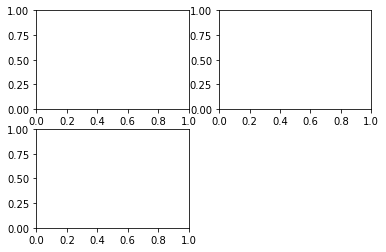

In [10]:
fig

Figure 9-2. An empty matplotlib igure with three subplots

One nuance of using **Jupyter notebooks is that plots are reset after each cell is evaluated,** so **for more complex plots you must put all of the plotting commands in a single notebook cell**

Here we run all of these commands in the same cell:

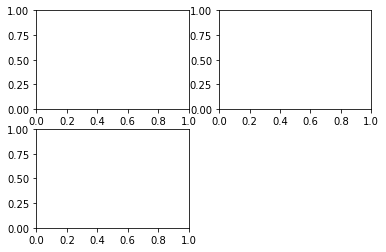

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), **matplotlib draws on the last figure and subplot** used (creating one if necessary), thus hiding the figure and subplot creation

So if we add the following command, you’ll get something like Figure 9-3:

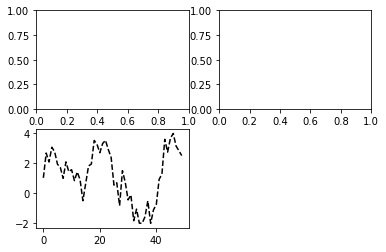

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

Figure 9-3. Data visualization ater single plot

The 'k--' is a style option instructing matplotlib to plot a black dashed line

The objects returned by fig.add_subplot here are AxesSubplot objects, on which you can directly plot on the other empty subplots by calling each one’s instance method (see Figure 9-4):

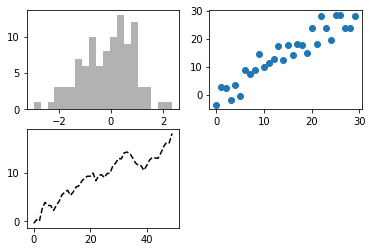

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Figure 9-4. Data visualization ater additional plots

Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method **plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects:**

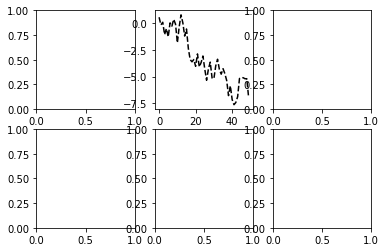

In [14]:
fig, axes = plt.subplots(2, 3)
axes[0, 1].plot(np.random.randn(50).cumsum(), 'k--')

In [15]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8999708810>,
      dtype=object)

This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example, axes[0, 1]

ou can also indicate that subplots should have the same x- or y-axis using **sharex** and **sharey**, respectively

This is especially useful when you’re comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently

See Table 9-1 for more on this method

Table 9-1. pyplot.subplots options
<p align='center'>
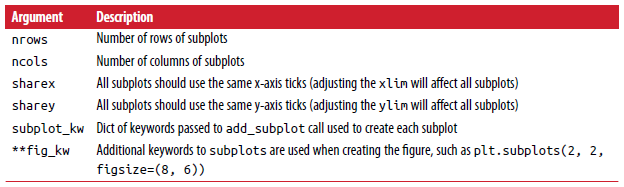
</p>

### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots

This spacing is all specified **relative to the height and width of the plot,** so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself

You can change the spacing using the subplots_adjust method on Figure objects, also avail able as a top-level function:



```
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```



**wspace and hspace** controls the percent of the figure width and figure height, respectively, to use as **spacing between subplots**

Here is a small example where I shrink the spacing all the way to zero (see Figure 9-5):

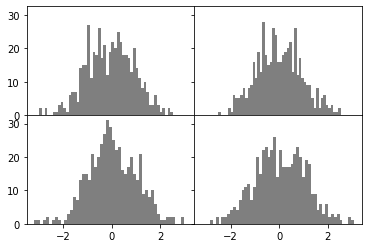

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
  for j in range(2):
    axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

Figure 9-5. Data visualization with no inter-subplot spacing

You may notice that the axis labels overlap. **matplotlib doesn’t check whether the labels overlap,** so in a case like this you would need to fix the labels yourself by speci fying explicit tick locations and tick labels

## Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style

For example, to plot x versus y with green dashes, you would execute:

```
ax.plot(x, y, 'g--')
```

This way of specifying both color and line style in a string is provided as a conve nience; **in practice if you were creating plots programmatically you might prefer not to have to munge strings together to create plots with the desired style**

The same plot could also have been expressed more explicitly as:



```
ax.plot(x, y, linestyle='--', color='g')
```



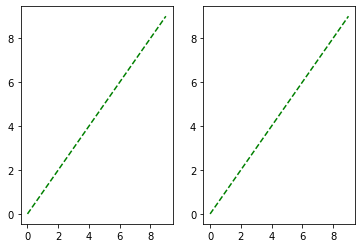

In [17]:
x = np.arange(10)
y = np.arange(10)
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, y, 'g--')
axes[1].plot(x, y, linestyle='--', color='g')

There are a number of color abbreviations provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE')

**You can see the full set of line styles by looking at the docstring for plot (use plot?** in IPython or Jupyter)

In [18]:
#plt.plot?

Line plots can additionally have markers to highlight the actual data points

Since matplotlib creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie

**The marker can be part of the style string, which must have color followed by marker type and line style** (see Figure 9-6):

In [19]:
from numpy.random import randn

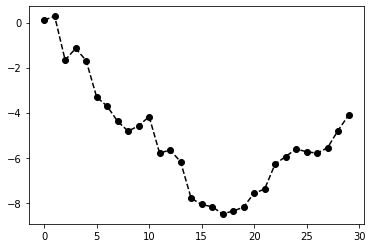

In [20]:
plt.plot(randn(30).cumsum(), 'ko--')

Figure 9-6. Line plot with markers

This could also have been written more explicitly as:

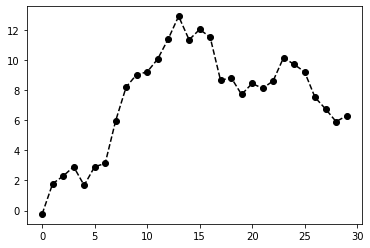

In [21]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, you will notice that subsequent points are **linearly interpolated by default**. **This can be altered with the drawstyle option** (Figure 9-7):

In [22]:
data = np.random.randn(30).cumsum()

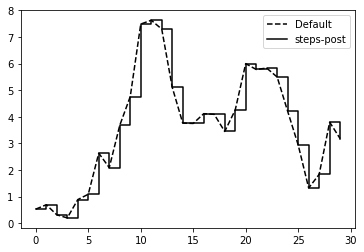

In [23]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Figure 9-7. Line plot with diferent drawstyle options

Here, since we passed the label arguments to plot, we are able to create a plot legend to identify each line using plt.legend

## Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: **using the procedural pyplot interface (i.e., matplotlib .pyplot)** and the more **object-oriented native matplotlib API**

The pyplot interface, designed for interactive use, consists of methods like **xlim, xticks, and xticklabels**

These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:

* **Called with no arguments returns the current parameter value** (e.g., plt.xlim() returns the current x-axis plotting range)

* Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets the x-axis range to 0 to 10)

**All such methods act on the active or most recently created AxesSubplot**

Each of them corresponds to two methods on the subplot object itself; in the case of xlim these are **ax.get_xlim and ax.set_xlim**

I prefer to use the subplot instance methods myself in the interest of being explicit (and especially when working with multiple subplots)



### Setting the title, axis labels, ticks, and ticklabels

To illustrate customizing the axes, I’ll create a simple figure and plot of a random walk (see Figure 9-8):

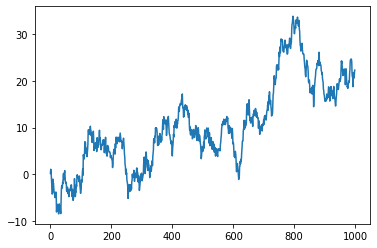

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Figure 9-8. Simple plot for illustrating xticks (with label)

To change the x-axis ticks, it’s easiest to use **set_xticks and set _xticklabels**

**The former instructs matplotlib where to place the ticks along the data range;** by default these locations will also be the labels. **But we can set any other values as the labels using set_xticklabels:**

In [25]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

The rotation option sets the x tick labels at a 30-degree rotation

Lastly, set_xlabel gives a name to the x-axis and set_title the subplot title (see Figure 9-9 for the resulting figure):

Text(0.5, 0, 'Stages')

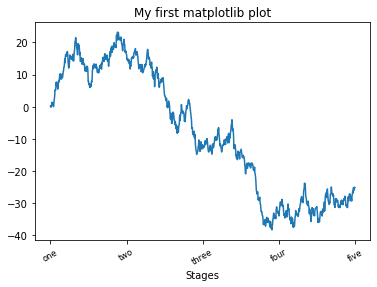

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # Overwritten by labels
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Figure 9-9. Simple plot for illustrating xticks

Modifying the y-axis consists of the same process, substituting y for x in the above

The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:

In [27]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 17.200000000000003, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

### Adding legends

Legends are another critical element for identifying plot elements. There are a couple of ways to add one. **The easiest is to pass the label argument when adding each piece of the plot:**

In [28]:
from numpy.random import randn

Once you’ve done this, you can either call ax.legend() or plt.legend() to automatically create a legend. The resulting plot is in Figure 9-10:

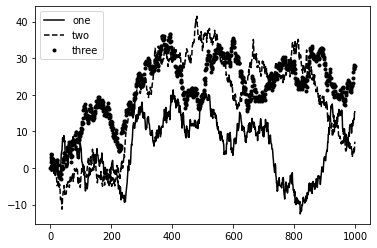

In [29]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc=('best'))

Figure 9-10. Simple plot with three lines and legend

The legend method has several other choices for the location loc argument. See the docstring (with ax.legend?) for more information

In [30]:
#ax.legend?

The loc tells matplotlib where to place the plot. If you aren’t picky, 'best' is a good option, as it will choose a location that is most out of the way

To exclude one or more elements from the legend, **pass no label** or **label='_ nolegend_'**

## Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot **annotations, which could consist of text, arrows, or other shapes**

You can add annotations and text using the **text, arrow, and annotate functions**

text draws text at given coordinates (x, y) on the plot with optional custom styling:

In [31]:
x = 1
y = 1
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

Text(1, 1, 'Hello world!')

Annotations can draw both text and arrows arranged appropriately 

As an example, let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance) and annotate it with some of the important dates from the 2008–2009 financial crisis

You can most easily reproduce this code example in a single cell in a Jupyter note book. See Figure 9-11 for the result:

In [32]:
!mkdir examples
import urllib.request
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv'
filename = 'examples/spx.csv'
urllib.request.urlretrieve(url, filename)

mkdir: cannot create directory ‘examples’: File exists


('examples/spx.csv', <http.client.HTTPMessage at 0x7f8998f91a10>)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

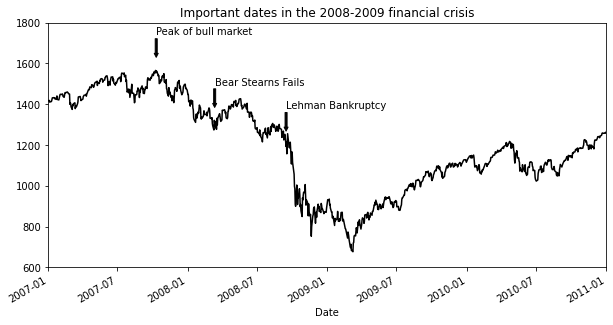

In [33]:
from datetime import datetime
import pandas as pd

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

Figure 9-11. Important dates in the 2008–2009 inancial crisis

The ax.annotate method can draw labels at the indicated x and y coordinates

**We use the set_xlim and set_ylim methods to manually set the start and end boundaries** for the plot rather than using matplotlib’s default. Lastly, ax.set_title adds a main title to the plot

Drawing shapes requires some more care. **matplotlib has objects that represent many common shapes, referred to as patches**

Some of these, like Rectangle and Circle, are found in matplotlib.pyplot, but **the full set is located in matplotlib.patches**

To add a shape to a plot, you **create the patch object shp and add it to a subplot by calling ax.add_patch(shp)** (see Figure 9-12):

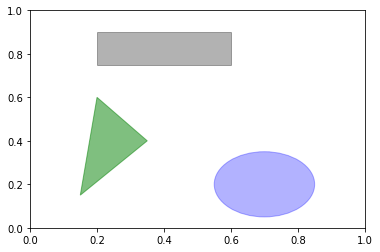

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

Figure 9-12. Data visualization composed from three diferent patches

## Saving Plots to File

**You can save the active figure to file using plt.savefig**

This method is **equivalent to the figure object’s savefig instance method.** For example, to save an SVG version of a figure, you need only type:

In [35]:
fig.savefig('figpath.svg')

The file type is inferred from the file extension. So if you used .pdf instead, you would get a PDF

There are a couple of important options that I use frequently for publishing graphics: **dpi, which controls the dots-per-inch resolution,** and **bbox _inches, which can trim the whitespace around the actual figure**

To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you would do:


In [36]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

savefig doesn’t have to write to disk; it can also write to any file-like object, such as a BytesIO:

In [37]:
from io import BytesIO
buffer = BytesIO()
fig.savefig(buffer)
plot_data = buffer.getvalue()
plot_data;

See Table 9-2 for a list of some other options for savefig

Table 9-2. Figure.saveig options
<p align='center'>
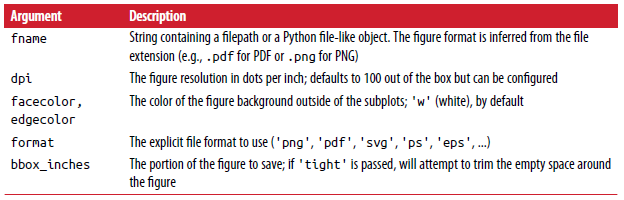
</p>

## matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication

Fortunately, nearly all of the default behavior can be customized via an extensive set of **global parameters** governing figure size, subplot spacing, colors, font sizes, grid styles, and so on

**One way to modify the configuration programmatically from Python is to use the rc method**

for example, to set the global default figure size to be 10 x 10, you could enter:

In [38]:
#plt.rc('figure', figsize=(10, 10))

**The first argument to rc is the component you wish to customize, such as 'figure', 'axes', ' xtick', 'ytick', 'grid', 'legend', or many others**

After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in your program is as a dict:

In [39]:
#font_options = {'family' : 'monospace',
#                'weight' : 'bold',
#                'size' : 10}
#plt.rc('font', **font_options)

For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file matplotlibrc in the matplotlib/mpl-data directory

If you customize this file and place it in your home directory titled .matplotlibrc, it will be loaded each time you use matplotlib

# 9.2 Plotting with pandas and seaborn

matplotlib can be a fairly low-level tool

You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations

In pandas we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects

Another library is [seaborn](https://seaborn.pydata.org/), a statistical graphics library created by Michael Waskom. Seaborn simplifies creating many common visualization types

## Line Plots

**Series and DataFrame each have a plot attribute** for making some basic plot types. By default, plot() makes line plots (see Figure 9-13):

In [40]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

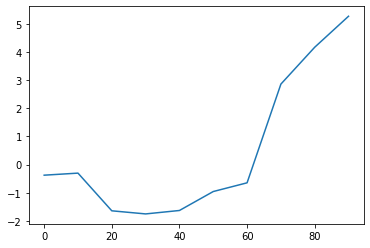

In [41]:
s.plot()

Figure 9-13. Simple Series plot

The S**eries object’s index is passed to matplotlib for plotting on the x-axis**, though you can disable this by passing **use_index=False**

The x-axis ticks and limits can be adjusted with the xticks and xlim options, and y-axis respectively with yticks and ylim

**Most of pandas’s plotting methods accept an optional ax parameter**, which can be a matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout

DataFrame’s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically (see Figure 9-14):


In [42]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

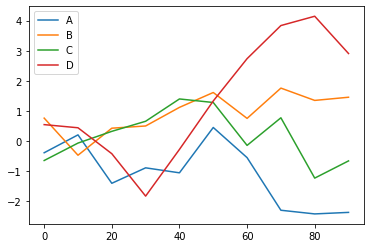

In [43]:
df.plot()

Figure 9-14. Simple DataFrame plot

See Table 9-3 for a full listing of plot options

Table 9-3. Series.plot method arguments
<p align='center'>
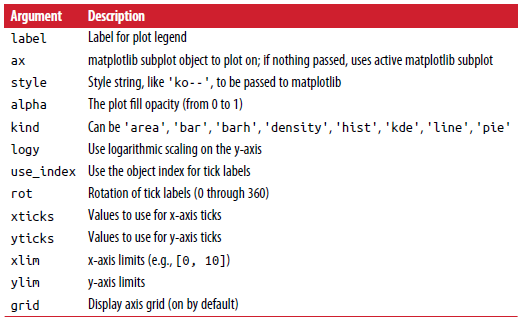
</p>

DataFrame has a number of options allowing some flexibility with how the columns are handled

For example, whether to plot them all on the same subplot or to create separate subplots

See Table 9-4 for more on these

Table 9-4. DataFrame-speciic plot arguments
<p align='center'>
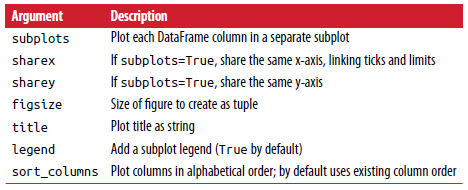
</p>

## Bar Plots

The **plot.bar() and plot.barh() make vertical and horizontal bar plots**, respectively

In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks (see Figure 9-15):

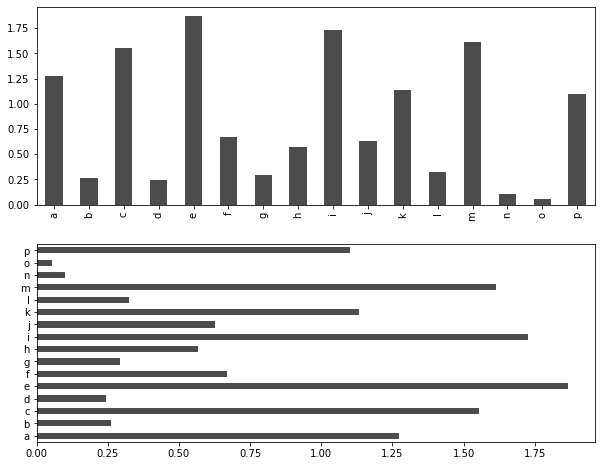

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
data = pd.Series(abs(np.random.randn(16)), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

Figure 9-15. Horizonal and vertical bar plot

The options color='k' and alpha=0.7 set the color of the plots to black and use partial transparency on the filling

With a DataFrame, **bar plots group the values in each row together in a group in bars, side by side,** for each value. See Figure 9-16:

In [45]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [46]:
df

Genus,A,B,C,D
one,0.966432,0.115899,0.537042,0.451278
two,0.344165,0.467389,0.226122,0.638404
three,0.982549,0.280314,0.174052,0.744708
four,0.302466,0.861484,0.882284,0.295045
five,0.330801,0.668336,0.317573,0.099492
six,0.190822,0.297112,0.538349,0.338925


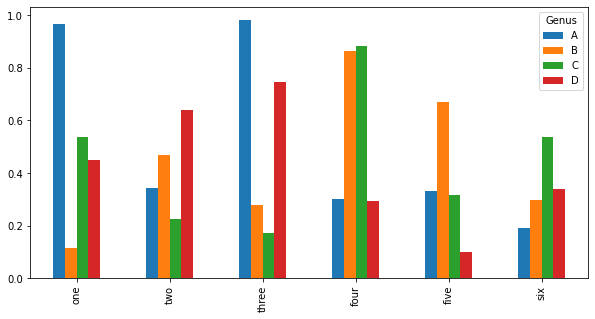

In [47]:
df.plot.bar(figsize=(10, 5))

Figure 9-16. DataFrame bar plot

Note that **the name “Genus” on the DataFrame’s columns is used to title the legend**

We create stacked bar plots from a DataFrame by passing stacked =True, resulting in the value in each row being stacked together (see Figure 9-17):

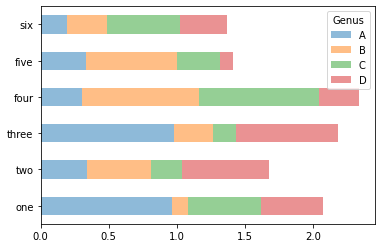

In [48]:
df.plot.barh(stacked=True, alpha=0.5)

Figure 9-17. DataFrame stacked bar plot

A useful recipe for bar plots is to visualize a Series’s value frequency using value_counts: s.value_counts().plot.bar()

Returning to the tipping dataset used earlier in the book, **suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day**

I load the data using read_csv and make a cross-tabulation by day and party size:

In [49]:
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv'
filename = 'examples/tips.csv'
urllib.request.urlretrieve(url, filename)

('examples/tips.csv', <http.client.HTTPMessage at 0x7f8998208710>)

In [50]:
tips = pd.read_csv('examples/tips.csv')

In [51]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [52]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [53]:
party_counts #Not many 1- and 6-person parties

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


Then, normalize so that each row sums to 1 and make the plot (see Figure 9-18):

In [54]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [55]:
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


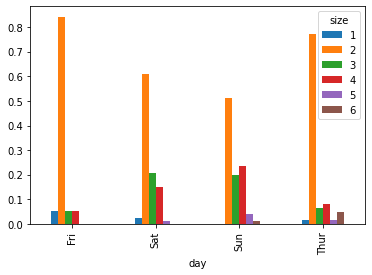

In [56]:
party_pcts.plot.bar()

Figure 9-18. Fraction of parties by size on each day

So you can see that party sizes appear to increase on the weekend in this dataset

With data that **requires aggregation or summarization** before making a plot, using the **seaborn** package can make things much simpler

Let’s look now at the tipping percentage by day with seaborn (see Figure 9-19 for the resulting plot):

In [57]:
import seaborn as sns

In [58]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [59]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


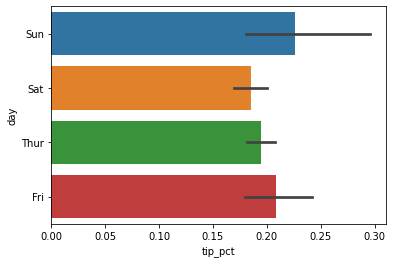

In [60]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Figure 9-19. Tipping percentage by day with error bars

Plotting functions in **seaborn take a data argument,** which can be a pandas DataFrame. The other arguments refer to column names

Because there are multiple observations for each value in the day, the bars are the average value of tip_pct

The black lines drawn on the bars represent the 95% confidence interval (this can be configured through optional arguments)

seaborn.barplot has a **hue option that enables us to split by an additional categorical value** (Figure 9-20):


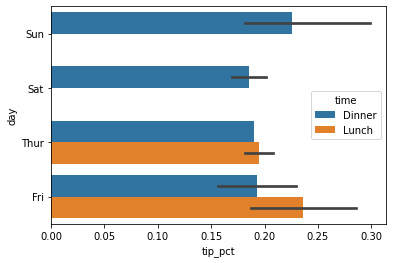

In [61]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Figure 9-20. Tipping percentage by day and time

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors

You can switch between different plot appearances using seaborn.set:

## Histograms and Density Plots

A histogram is a kind of bar plot that gives a discretized display of value frequency

The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted

Using the tipping data from before, we can make a **histogram of tip percentages of the total bill using** the plot.hist method on the Series (see Figure 9-21):

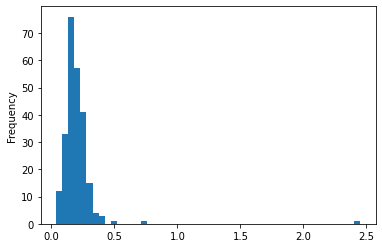

In [62]:
tips['tip_pct'].plot.hist(bins=50)

Figure 9-21. Histogram of tip percentages

related plot type is a **density plot,** **which is formed by computing an estimate of a continuous probability distribution** that might have generated the observed data

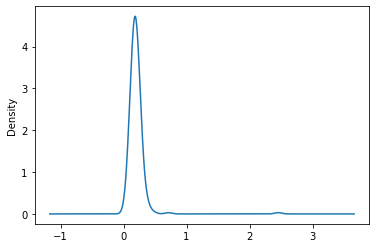

In [63]:
tips['tip_pct'].plot.density()